## HEART DISEASE PREDICTION - LOGISTIC REGRESSION 

## About Dataset

Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

Source

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:

• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [333]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [334]:
df = pd.read_csv("heart.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Shape of Dataset

In [335]:
df.shape

(4238, 16)

Total 4238 rows and 16 features including output feature are present in dataset.

## Basic info of dataset

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## Statistical Description

In [337]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Features of Dataset

In [338]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Drop Education feature

In [339]:
df = df.drop(columns=['education'])
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Checking missing value and its handling

In [340]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

The dataset contains the missing values

<Axes: >

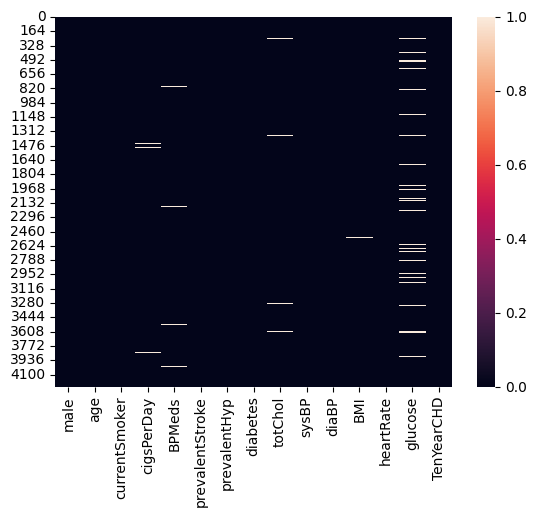

In [341]:
##visulaizing missing value using heatmap
sns.heatmap(df.isnull())

In [342]:
#handeling missing value

df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mean())
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

In [343]:
df.isnull().sum()


male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<Axes: >

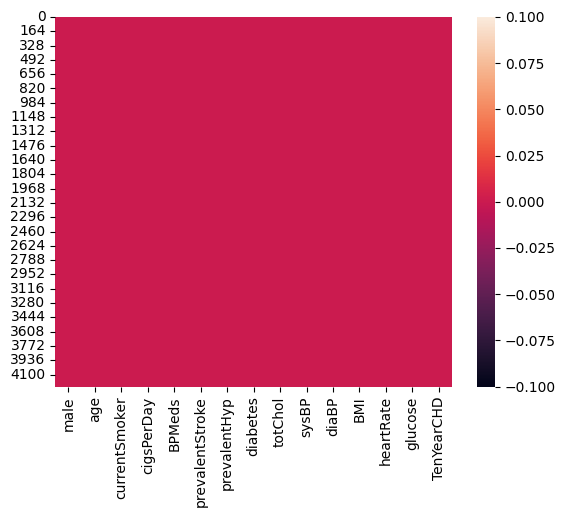

In [344]:
sns.heatmap(df.isnull())

Now dataset has Zero missing Value

## Checking Dataset is Imbalanced or Not

In [345]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

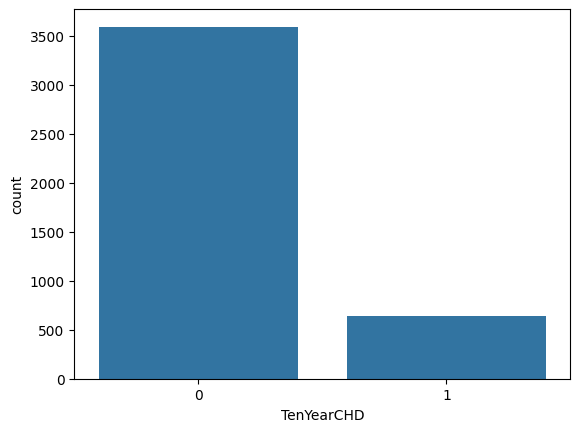

In [346]:
sns.countplot(x=df['TenYearCHD'])

In [347]:
#Handle imbalanced data
from sklearn.utils import resample

#diving dataset according to output class
df_majority = df[df['TenYearCHD'] == 0]  
df_minority = df[df['TenYearCHD'] == 1]

# Perform upsampling on the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,            # Sample with replacement
                                 n_samples=len(df_majority),  # Match number in majority class
                                 random_state=42)         # For reproducibility

# Combine the upsampled minority class with the original majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the DataFrame to mix the classes
df_upsampled = df_upsampled.sample(frac=1).reset_index(drop=True)

In [348]:
#now checking value counts
df_upsampled['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1    3594
Name: count, dtype: int64

In [349]:
#reassign
df = df_upsampled


## Checking datatypes of all features

In [350]:
for i in df.columns:
    print("Datatype of " , i , "column is " , df[i].dtype)

Datatype of  male column is  int64
Datatype of  age column is  int64
Datatype of  currentSmoker column is  int64
Datatype of  cigsPerDay column is  float64
Datatype of  BPMeds column is  float64
Datatype of  prevalentStroke column is  int64
Datatype of  prevalentHyp column is  int64
Datatype of  diabetes column is  int64
Datatype of  totChol column is  float64
Datatype of  sysBP column is  float64
Datatype of  diaBP column is  float64
Datatype of  BMI column is  float64
Datatype of  heartRate column is  float64
Datatype of  glucose column is  float64
Datatype of  TenYearCHD column is  int64


## Checking Outliers and Handling outliers

<Axes: >

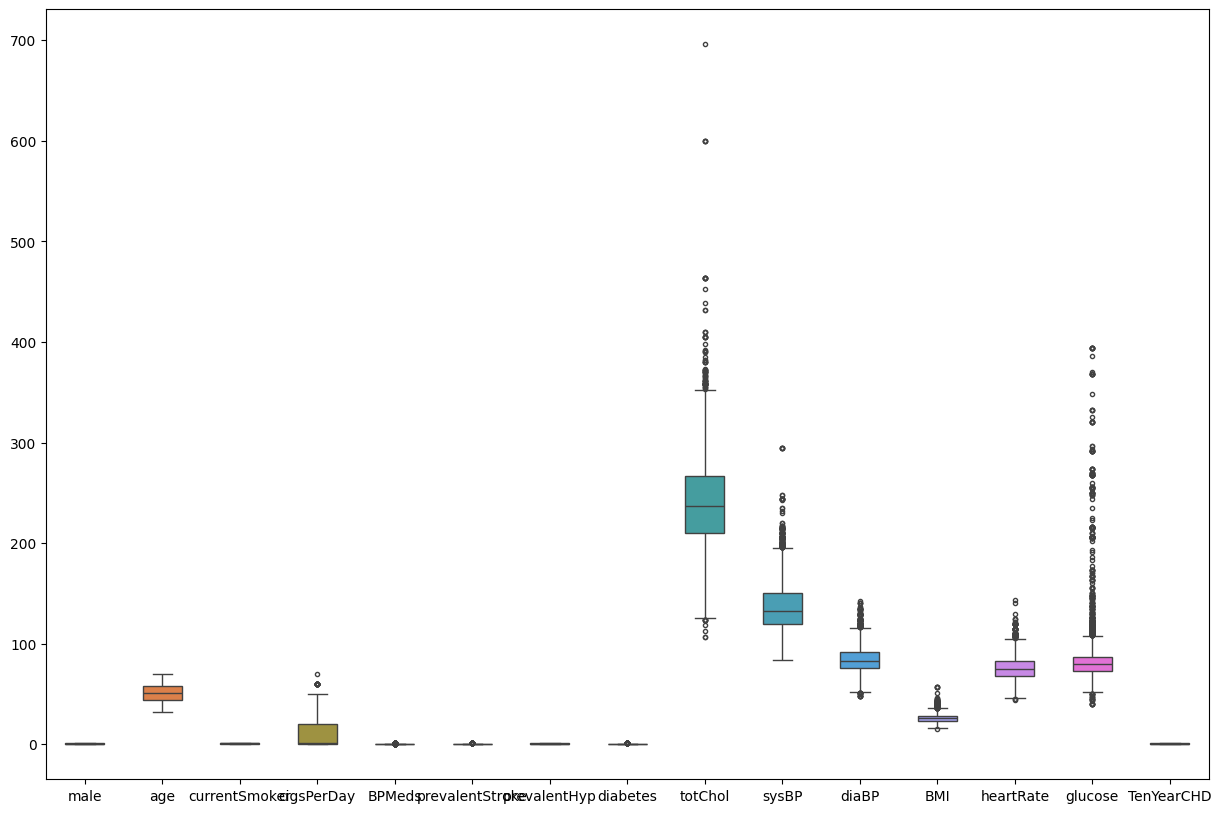

In [351]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [352]:
## Replace Outlier with Median value of Feature

#handling totChol feature
minimum,q1,q2,q3,maximum = np.quantile(df['totChol'],[0,0.25,0.50,0.75,1.0])
#calulate IQR
iqr = q3-q1
lower_fence = q1-1.5*(iqr)  #minimum
higher_fence = q3+1.5*(iqr) #maximum
#replacing outlier
median = df['totChol'].median()   #using median maintian the distribution
df['totChol'] = np.where(df['totChol']>higher_fence,median,df['totChol'])
df['totChol'] = np.where(df['totChol']<lower_fence,median,df['totChol'])
          
     #or

#for i in df['totChol']:
#     if i<lower_fence or i>higher_fence:
#         df.loc[i,'totChol']=df['totChol'].mean()

        


In [353]:
minimum,q1,q2,q3,maximum = np.quantile(df['sysBP'],[0,0.25,0.50,0.75,1.0])
#calulate IQR
iqr = q3-q1
lower_fence = q1-1.5*(iqr)  #minimum
higher_fence = q3+1.5*(iqr) #maximum
#replacing outlier
median = df['sysBP'].median()   #using median maintian the distribution
df['sysBP'] = np.where(df['sysBP']>higher_fence,median,df['sysBP'])
df['sysBP'] = np.where(df['sysBP']<lower_fence,median,df['sysBP'])

In [354]:
minimum,q1,q2,q3,maximum = np.quantile(df['diaBP'],[0,0.25,0.50,0.75,1.0])
#calulate IQR
iqr = q3-q1
lower_fence = q1-1.5*(iqr)  #minimum
higher_fence = q3+1.5*(iqr) #maximum
#replacing outlier
median = df['diaBP'].median()   #using median maintian the distribution
df['diaBP'] = np.where(df['diaBP']>higher_fence,median,df['diaBP'])
df['diaBP'] = np.where(df['diaBP']<lower_fence,median,df['diaBP'])

In [355]:
minimum,q1,q2,q3,maximum = np.quantile(df['BMI'],[0,0.25,0.50,0.75,1.0])
#calulate IQR
iqr = q3-q1
lower_fence = q1-1.5*(iqr)  #minimum
higher_fence = q3+1.5*(iqr) #maximum
#replacing outlier
median = df['BMI'].median()   #using median maintian the distribution
df['BMI'] = np.where(df['BMI']>higher_fence,median,df['BMI'])
df['BMI'] = np.where(df['BMI']<lower_fence,median,df['BMI'])

In [356]:
minimum,q1,q2,q3,maximum = np.quantile(df['heartRate'],[0,0.25,0.50,0.75,1.0])
#calulate IQR
iqr = q3-q1
lower_fence = q1-1.5*(iqr)  #minimum
higher_fence = q3+1.5*(iqr) #maximum
#replacing outlier
median = df['heartRate'].median()   #using median maintian the distribution
df['heartRate'] = np.where(df['heartRate']>higher_fence,median,df['heartRate'])
df['heartRate'] = np.where(df['heartRate']<lower_fence,median,df['heartRate'])

In [357]:
minimum,q1,q2,q3,maximum = np.quantile(df['glucose'],[0,0.25,0.50,0.75,1.0])
#calulate IQR
iqr = q3-q1
lower_fence = q1-1.5*(iqr)  #minimum
higher_fence = q3+1.5*(iqr) #maximum
#replacing outlier
median = df['glucose'].median()   #using median maintian the distribution
df['glucose'] = np.where(df['glucose']>higher_fence,median,df['glucose'])
df['glucose'] = np.where(df['glucose']<lower_fence,median,df['glucose'])

## Segergate Numerical and Categorical Features

In [358]:
columns = df.columns
num_col = []
cat_col = []

for i in columns:
    if df[i].dtype == 'O':
        cat_col.append(i)
    else:
        num_col.append(i)

print("Categorical columns are : " , cat_col)
print("Numerical columns are : " , num_col)

Categorical columns are :  []
Numerical columns are :  ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


## Divide Dataset into Dependent and Independent Features

In [359]:
X = df.iloc[:,:-1]  #independent feature
y = df.iloc[:,-1]  #dependent feature

## Train Test split

In [360]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)

## Standardization

In [361]:
import pickle
from sklearn.preprocessing import StandardScaler
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [362]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

## Model Training

In [363]:
from sklearn.linear_model  import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

## Hyperparameter tunning

In [364]:
## GridSearch CV
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [365]:
#best parameters
clf.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [366]:
#best score
clf.best_score_

0.6724743575365981

## Prediction


In [367]:
y_pred = clf.predict(X_test_scaled)

## Confusion Matrix

In [368]:
from sklearn.metrics import accuracy_score, confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [369]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.673409186683523

In [370]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.6624365482233503

In [371]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.6755823986194995

In [372]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6689448953438701

## Pickling the model

In [373]:
file = open('Prediction.pkl','wb')
pickle.dump(clf,file)
file.close()